# Практическая работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 0382 Прибылов Никита и Морева Елена. Вариант №15.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ). 

## Основные теоретические положения

#### Дискретный сигнал
Дискретный сигнал: $x_0, x_1, ..., x_{N-1}$ можно получить при помощи дискретизации аналогового сигнала $s(t)$.
Допустим, что отчёты $x_k, k = 0,1,...,N - 1$ дискретного сигнала получены в результаты равномерной дискретизации сигнала s(t) с шагом дискретизации, равным 1.
$$x_k = s(t_k), k = 0, 1, ..., N - 1;$$
$$t_k - t_{k-1} = T, k = 1, ..., N - 1; T = 1.$$
#### Спектр дискретного сигнала
Представим дискретный сигнал как функцию от времени.
$$s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t - k)$$
При помощи преобразования Фурье спектр дискретного сигнала можно представить в виде периодической функции с периодом, равным $2\pi$.
$$S(\omega) = \sum_{k=-\infty}^{\infty} x_k e^{-i\omega k}$$
Дискретный сигнал можно записать в виде
$$s_d(t) = \frac{1}{T}\sum_{k=-\infty}^{\infty} s(t)e^{i\omega_k t}$$
Спектр дискретного сигнала можно записать в виде
$$S_d(\omega) = \frac{1}{T} \sum_{k=-\infty}^{\infty} S(\omega - \frac{2\pi k}{T})$$
#### Теорема Котельникова
Сигнал $s(t)$, не содержащий гармоник с частотами, превышающими $\widehat{\omega} = 2\pi \widehat{f}$, может быть представлен без потери информации своими дискретными отсчётами $s(kT)$, удовлетворяющими условию
$$T \le \frac{1}{2\widehat{f}} = \frac{\pi}{\widehat{\omega}}$$
Восстановить исходный сигнал можно по формуле - разложению s(t) в ряд по системе функций:
$$s(t) = \sum_{k=-\infty}^{\infty} s(kT)\varphi_k(t)$$
где базис Котельникова
$$\varphi_k(t) = \frac{sin(\pi\frac{t - kT}{T})}{(\pi\frac{t - kT}{T})}$$
#### Дискретное преобразование Фурье
Пусть последовательность отсчётов ${x_k}$ является периодической с периодом $N$:
$$x_{k+N} = x_k \forall k$$
Расммотрим фрагмент последовательности из N отсчётов: $\{x_k: k = 0,1,2,...,N-1\}$. Тогда дискретная функция
$$s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t - kT)$$
тоже будет периодической с периодом NT, где T - период дискретизации.
Спектр $s(t)$ также должен быть периодическим с периодом $T = \frac{2\pi}{T}$ и дискретным с расстоянием между гармониками, равным $\frac{2\pi}{NT}$.
Так как $s(t)$ является периодической функцией, её можно разложить в ряд Фурье, коэффициенты которого вычисляются по следующей формуле:
$$X(n) = \sum_{k=0}^{N-1} x_k e^{-i\frac{2\pi n}{N}k}, n = 0,1,2,...,N-1$$
Обратной дискретное преобразование Фурье:
$$x_k = \frac{1}{N} \sum_{n=0}^{N-1} X(n) e^{i\frac{2\pi k}{N}n}, k=0,1,2,...,N-1$$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать. 

## Выполнение работы

Инициализация начальных значений:

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftfreq



Вспомогательная функция отрисовки графиков:

In [71]:
def plot(x, Y, Type='plot', legend=None, axis=None, title='', xlabel='', ylabel='', size=(15, 10)):
    plt.figure(figsize=size)
    if legend is None:
        legend = '',
    for y, label in zip(Y, legend):
        if Type == 'plot':
            plt.plot(x, y, label=label)
        elif Type == 'stem':
            if y is not Y[0]:
                plt.stem(x, y, label=label, linefmt="C1-", markerfmt="C1o")
            else:
                plt.stem(x, y, label=label)
    plt.legend()
    plt.grid()
    if axis is not None:
        plt.axis(axis)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

**Задание 1**

Сформировать дискретный сигнал посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k cos(\omega_k t + \varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\varDelta \omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N = 31$).

In [111]:
N = 31
T = 1
omega = np.arange(0, np.pi + 0.1 * np.pi, 0.1 * np.pi)
A = np.random.randint(1, 11, 11)
A = A / sum(A)
phi = np.random.random(size=11) / 2

**Задание 2**

Визуализировать исходные аналоговый и дискретизированный сигналы.

No handles with labels found to put in legend.


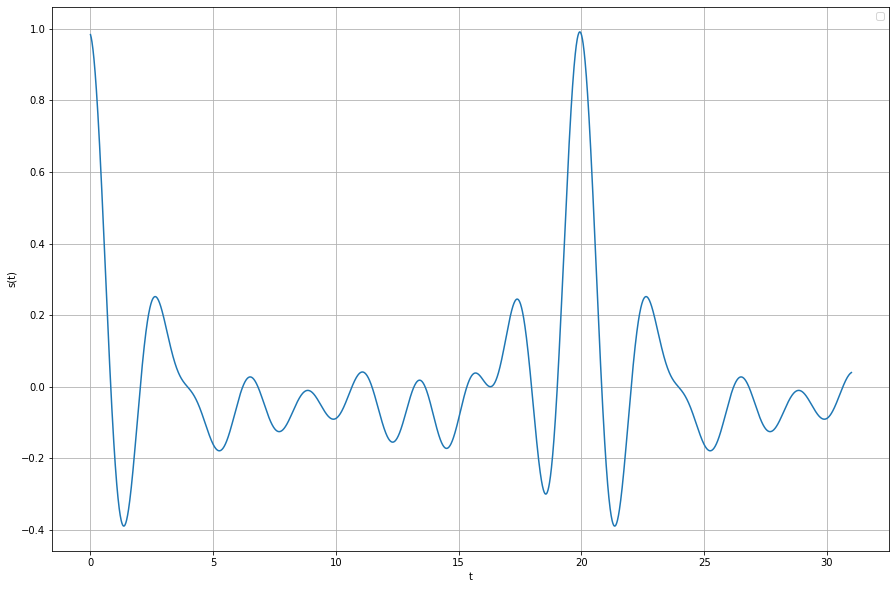

No handles with labels found to put in legend.


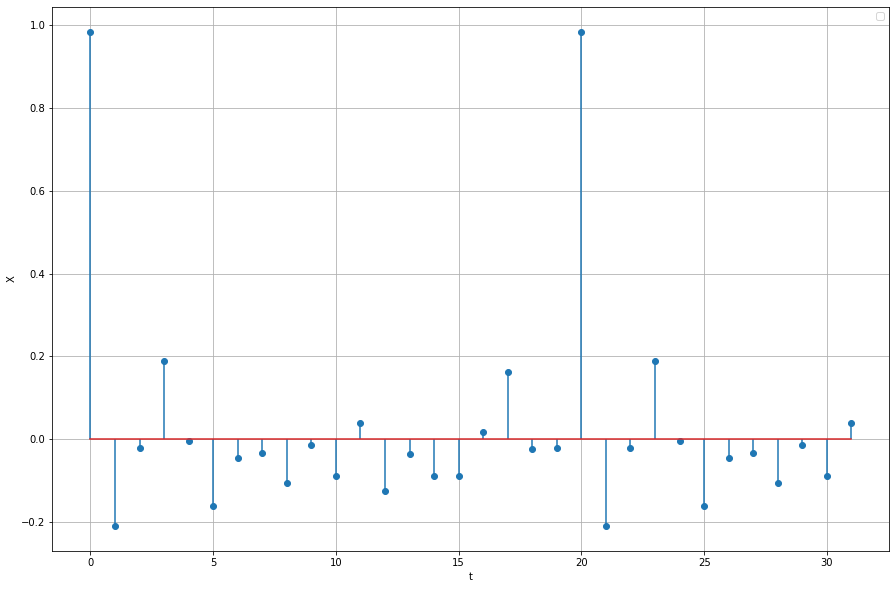

In [72]:
X1 = np.arange(0, N + 0.01, 0.01)
X2 = np.arange(0, N + T, T)

s = lambda t: sum([A[i] * np.cos(omega[i] * t + phi[i]) for i in range(11)])
Y1 = s(X1),
Y2 = s(X2),

plot(X1, Y1, Type='plot', title='', xlabel='t', ylabel='s(t)')
plot(X2, Y2, Type='stem', title='', xlabel='t', ylabel='X')


**Задание 3**

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

No handles with labels found to put in legend.


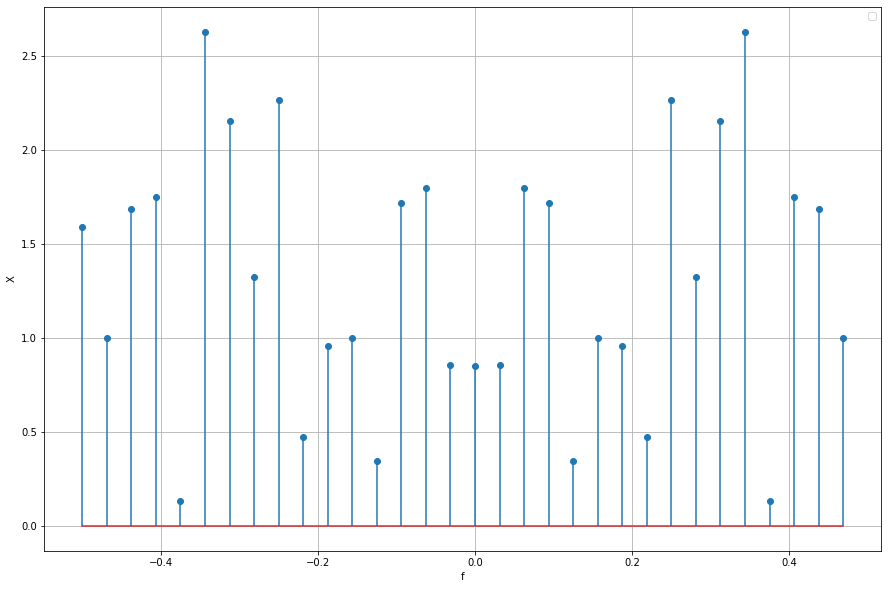

In [80]:
def dft(x):
    x = np.asarray(x)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j*np.pi*k*n/N)
    return np.dot(M, x)

X = fftfreq(N + 1, T)
Y = np.abs(dft([s(t) for t in X2])),

plot(X, YX, Type='stem', title='', xlabel='f', ylabel='X')


**Задание 4**

Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.
Формулы для линейного сглаживания по 5 и 9 точкам:
$$y_{n,5}=\frac{1}{5} \sum_{k=-2}^{2} x_{n+k}$$
$$y_{n,9}=\frac{1}{9} \sum_{k=-4}^{4} x_{n+k}$$
Передаточные функции для линейного сглаживания по 5-ти и 9-ти точкам:
$$H_5(\omega)=\frac{1}{5}(1 + 2cos(\omega)+2cos(2\omega))$$
$$H_9(\omega)=\frac{1}{9}(1+2cos(\omega)+2cos(2\omega)+2cos(3\omega)+2cos(4\omega))$$

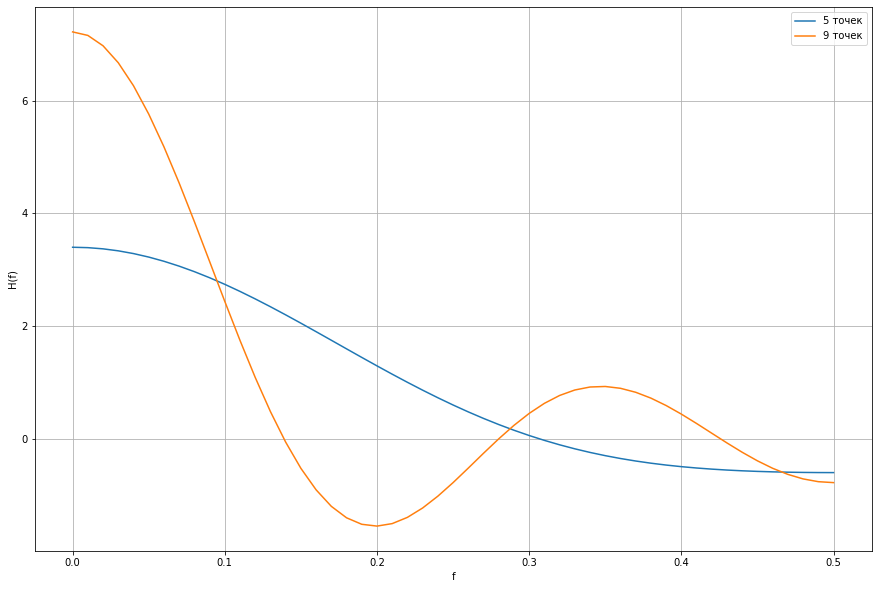

In [81]:
h5 = lambda f: 1 + 2*np.cos(2*np.pi * f) + 2*np.cos(4*np.pi*f) / 5
h9 = lambda f: 1 + 2*np.cos(2*np.pi * f) + 2*np.cos(4*np.pi*f) + 2 * np.cos(6*np.pi*f) + 2*np.cos(8*np.pi*f) / 9

X = np.arange(0, 0.5 + 0.01, 0.01)

plot(X, (h5(X), h9(X)), title='', legend=('5 точек','9 точек'), xlabel='f', ylabel='H(f)')

**Задание 5**

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

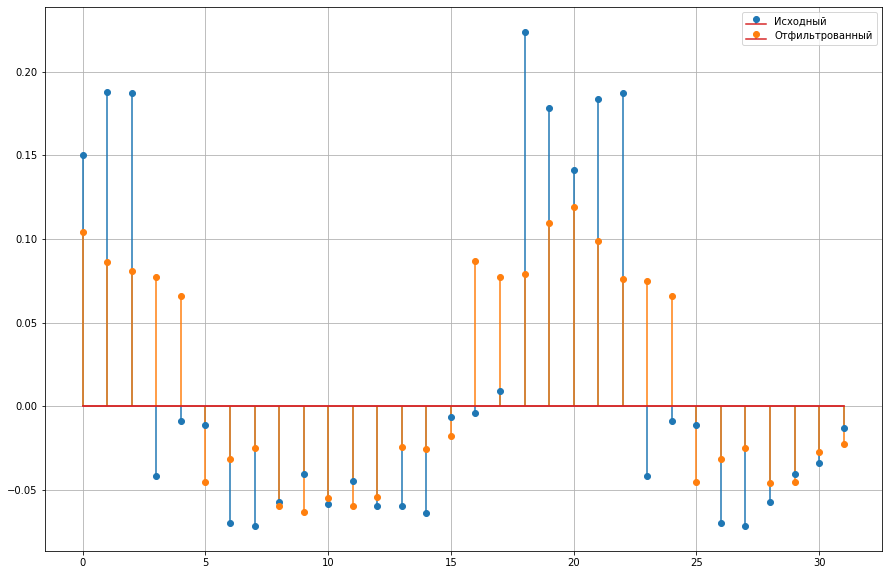

In [82]:
YX = s(X2)
Y5 = np.convolve(YX, np.ones(5), 'same') / 5
Y9 = np.convolve(YX, np.ones(9), 'same') / 9

plot(X2, (Y5, Y9), Type='stem', legend=('Исходный','Отфильтрованный'))

**Задание 6**

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

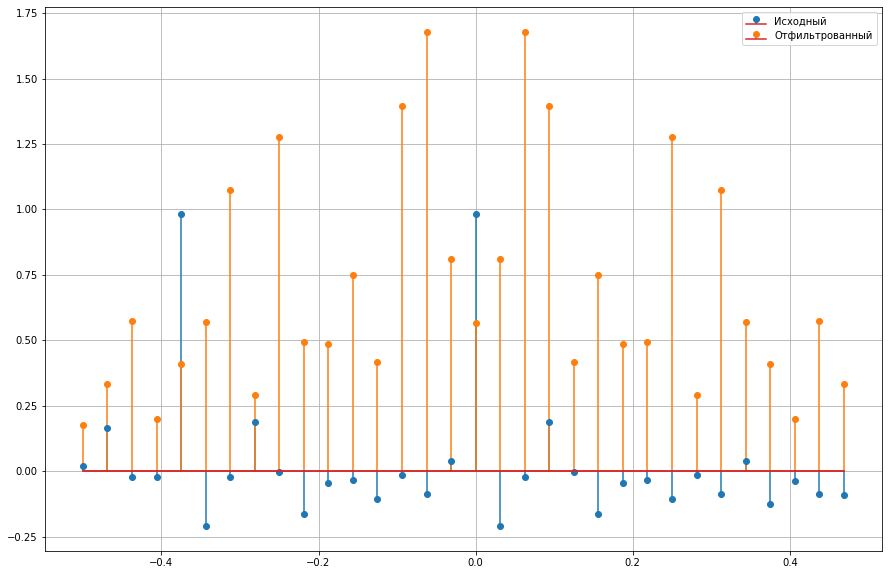

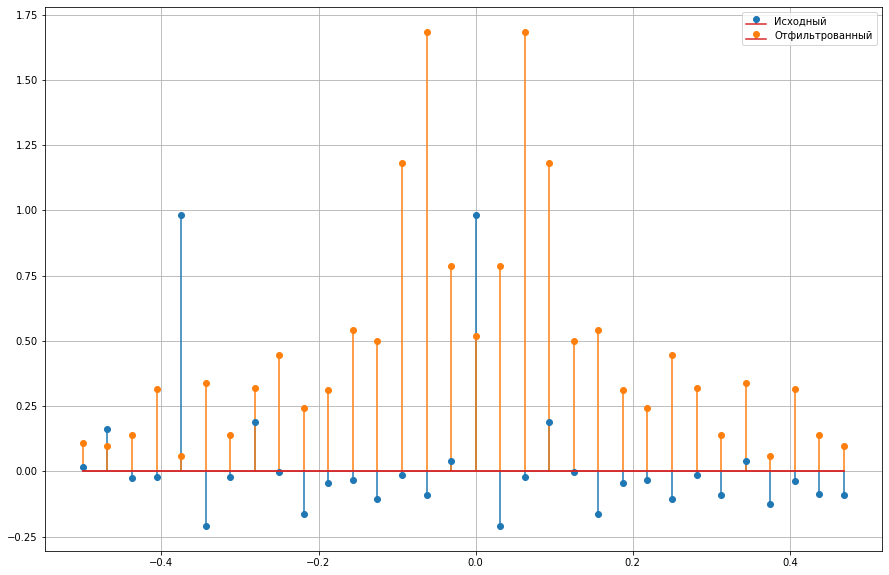

In [112]:
X = fftfreq(N + 1, T)
Y55 = np.abs(dft(Y5))

plot(X, (YX, Y55), Type='stem', legend=('Исходный', 'Отфильтрованный'))

X = fftfreq(N + 1, T)
Y99 = np.abs(dft(Y9))

plot(X, (YX, Y99), Type='stem', legend=('Исходный', 'Отфильтрованный'))

**Задание 7** 

Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

Исходя из полученных результатов по спектру можно сделать вывод, что пропуск сигнала происходит без ослабления при условии, что сигнал имеет постоянный уровень. Ослабевание сигналов, имеющих частоты около 0, происходит не так сильно, а сигналы с большими частотами заметно ослабевают. При увеличении числа точек полоса пропускания становится меньше.

**Задание 8**

Повторить п. 4–7 для следующих фильтров:

a. Сглаживание полиномом 2-ой степени по 5 и 9 узлам.

b. Сглаживание полиномом 4-ой степени по 7 и 11 узлам.



а. Фильтр сглаживания полиномом 2-ой степени по 5 и 9 узлам:

Формулы для сглаживания полиномом второй степени по 5-ти точкам и 9-ти точкам:
$$y_{n,5} = \frac{1}{35}(-3x_{n-2}+12x_{n-1}+17x_n+12x_{n+1}-3x_{n+2})$$
$$y_{n,9} = \frac{1}{231}(-21x_{n-4}+14x_{n-3}+39x_{n-2}+54x_{n-1}+59x_n+54x_{n+1}+39x_{n+2}+14x_{n+3}-21x_{n+4})$$
Передаточные функции для сглаживания полиномом второй степени по 5-ти точкам и 9-ти точкам:
$$H_5(\omega)=\frac{17+24cos(\omega)-6cos(2\omega)}{35}$$
$$H_9(\omega)=\frac{59+108cos(\omega)+78cos(2\omega)+28cos(3\omega)-42cos(4\omega)}{231}$$

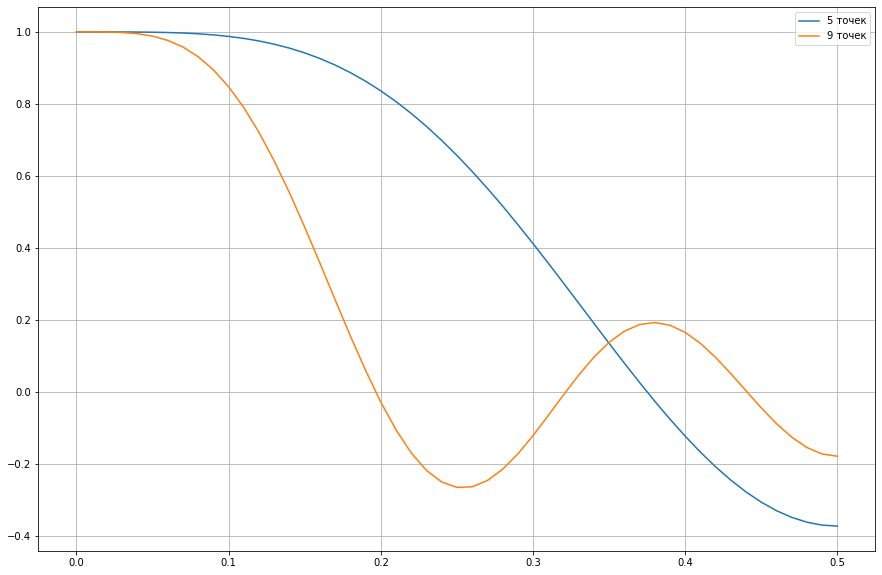

In [101]:
h5 = lambda f: (17 + 24 * np.cos(2 * np.pi * f) - 6 * np.cos(2 * 2 * np.pi * f)) / 35
h9 = lambda f: (59 + 108 * np.cos(2 * np.pi * f) + 78 * np.cos(2 * 2 * np.pi * f) + 28 * np.cos(3 * 2 * np.pi * f) - 42 * np.cos(4 * 2 * np.pi * f)) / 231

X = np.arange(0, 0.5 + 0.01, 0.01)
plot(X, (h5(X), h9(X)), legend=('5 точек', '9 точек'))

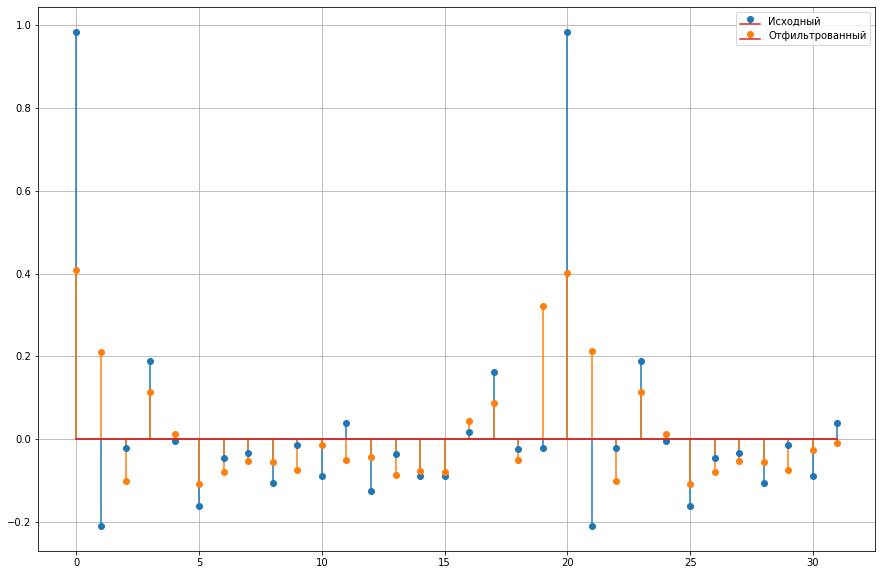

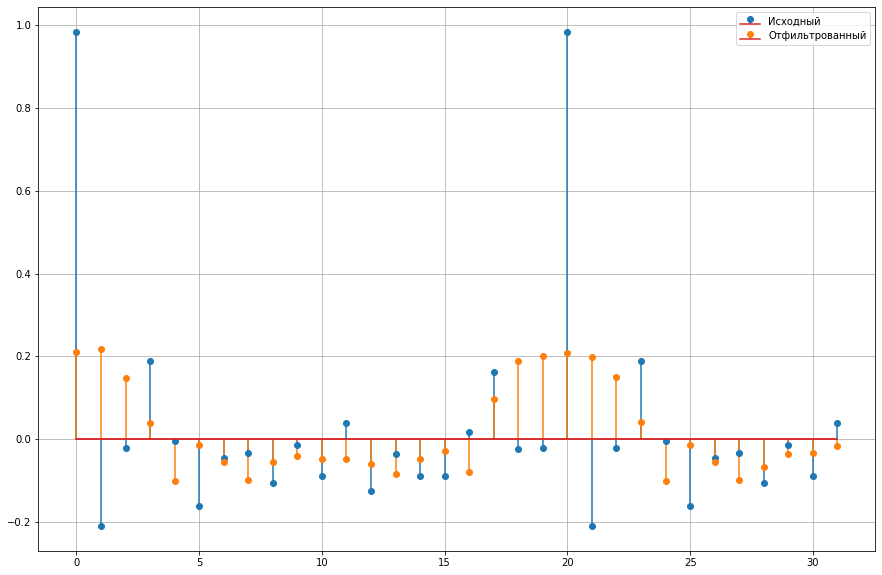

In [102]:
Y = [s(t) for t in X2]
Y5 = np.convolve(Y, np.array([-3, 12, 17, 12, -3]), 'same') / 35
Y9 = np.convolve(Y, np.array([-21, 14, 39, 54, 59, 54, 39, 14, - 21]), 'same') / 231

plot(X2, (Y, Y5), Type='stem', legend=('Исходный','Отфильтрованный'))
plot(X2, (Y, Y9), Type='stem', legend=('Исходный','Отфильтрованный'))

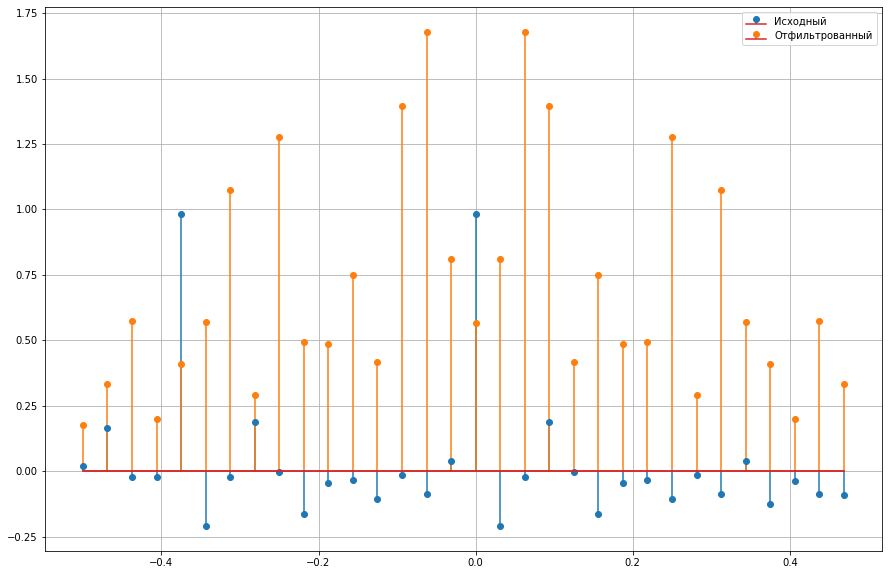

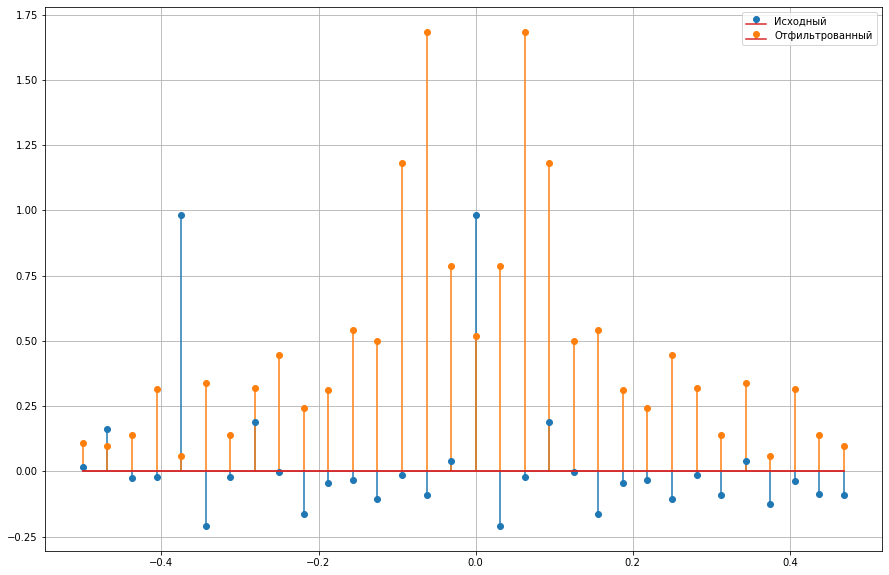

In [103]:
Y = fftfreq(N + 1, T)
Y55 = np.abs(dft(Y5))

plot(Y, (YX, Y55), Type='stem', legend=('Исходный','Отфильтрованный'))

Y = fftfreq(N + 1, T)
Y99 = np.abs(dft(Y9))

plot(Y, (YX, Y99), Type='stem', legend=('Исходный','Отфильтрованный'))

По графикам передаточных функций можно сделать следующие выводы:

При увеличении числа точек наблюдается прямая зависимость с крутизной среза - при увеличении одного параметра увеличивается и другой. Полоса пропускания частот имеет обратную зависимость с описанными выше параметрами.
В отличие от линейного фильтра, можно наблюдать более продолговатую часть в полосе пропускания в значениях частоты около 0. Следовательно, происходит малая потеря амплитуды при пропуске сигналов с низкой частотой в более широком диапазоне по сравнению с линейным фильтром.

b. Фильтр сглаживания полиномом 4-ой степени по 7 и 11 узлам.

Формулы для сглаживания полиномом четвёртой степени по 7-ти точкам и 11-ти точкам:
$$y_{n,7}=\frac{1}{231}(5x_{n-3}-30x_{n-2}+75x_{n-1}+131x_n+65x_{n+1}-30x_{n+2}+5x_{n+3})$$
$$y_{n,11}=\frac{1}{429}(18x_{n-5}-45x_{n-4}-10x_{n-3}+60x_{n-2}+120x_{n-1}+143x_n+120x_{n+1}+60x_{n+2}+10x_{n+3}-45x_{n+4}+18x_{n+5})$$
Передаточные функции для сглаживания полиномом второй степени по 5-ти точкам и 9-ти точкам:
$$H_5(\omega)=\frac{131+150cos(\omega)-60cos(2\omega)+10cos(3\omega)}{231}$$
$$H_9(\omega)=\frac{143+240cos(\omega)+120cos(2\omega)-20cos(3\omega)-90cos(4\omega)+36cos(5\omega)}{429}$$

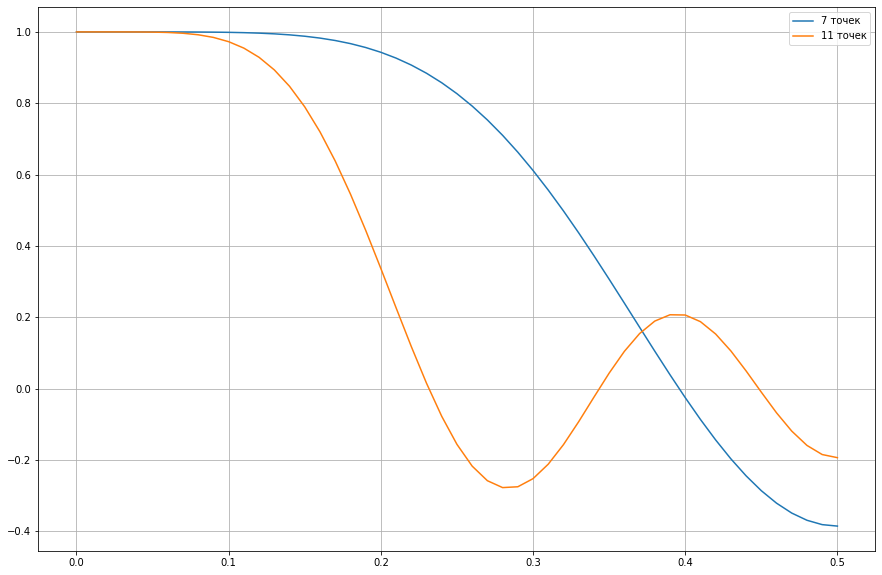

In [104]:
h7 = lambda f: (131 + 150 * np.cos(2 * np.pi * f) - 60 * np.cos(2 * 2 * np.pi * f) + 10 * np.cos(3 * 2 * np.pi * f)) / 231
h11 = lambda f: (143 + 240 * np.cos(2 * np.pi * f) + 120 * np.cos(2 * 2 * np.pi * f) - 20 * np.cos(3 * 2 * np.pi * f) - 90 * np.cos(4 * 2 * np.pi * f) + 36 * np.cos(5 * 2 * np.pi * f)) / 429

X = np.arange(0, 0.5 + 0.01, 0.01)
plot(X, (h7(X), h11(X)), legend=('7 точек', '11 точек'))

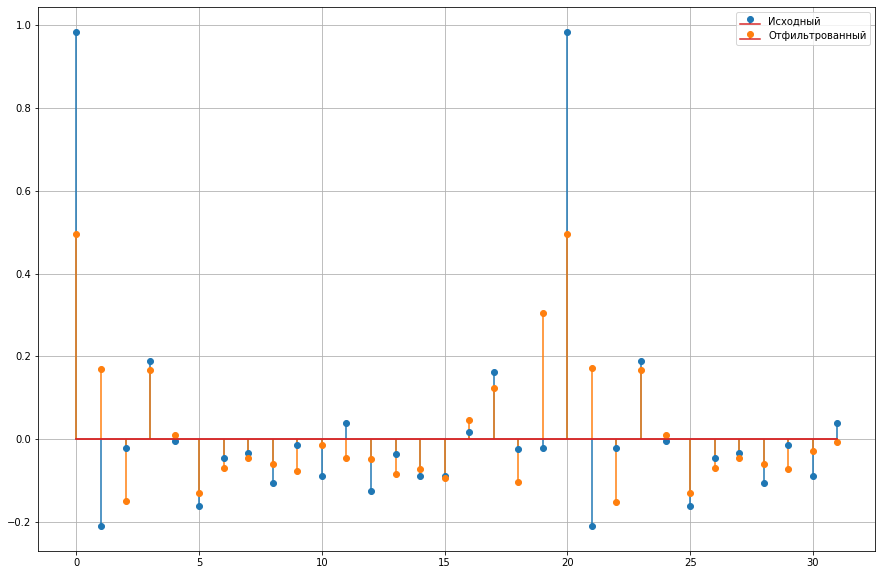

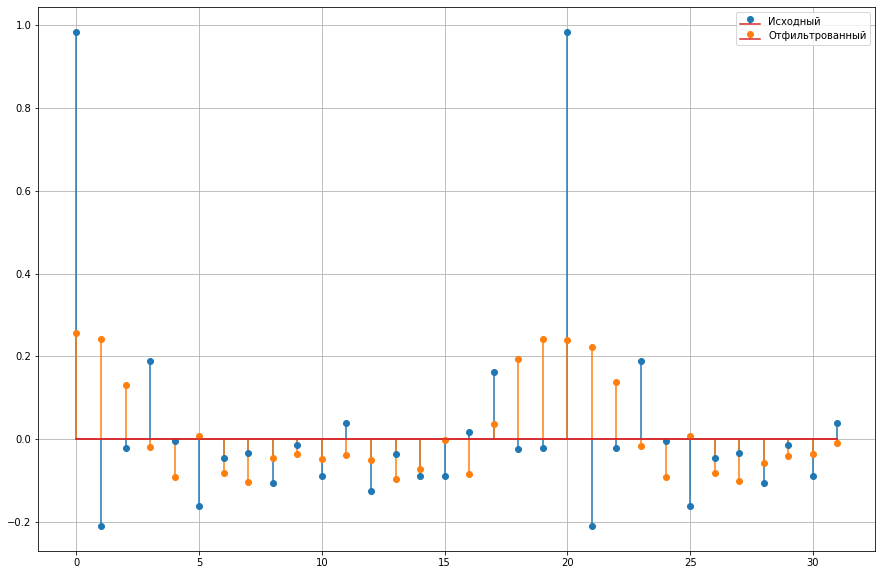

In [107]:
Y = [s(t) for t in X2]
Y7 = np.convolve(Y, np.array([5, -30, 75, 131, 75, -30, 5]), 'same') / 231
Y11 = np.convolve(Y, np.array([13, -45, -10, 60, 120, 143, 120, 60, -10, -45, 13]), 'same') / 429

plot(X2, (YX, Y7), Type='stem', legend=('Исходный', 'Отфильтрованный'))
plot(X2, (YX, Y11), Type='stem', legend=('Исходный', 'Отфильтрованный'))

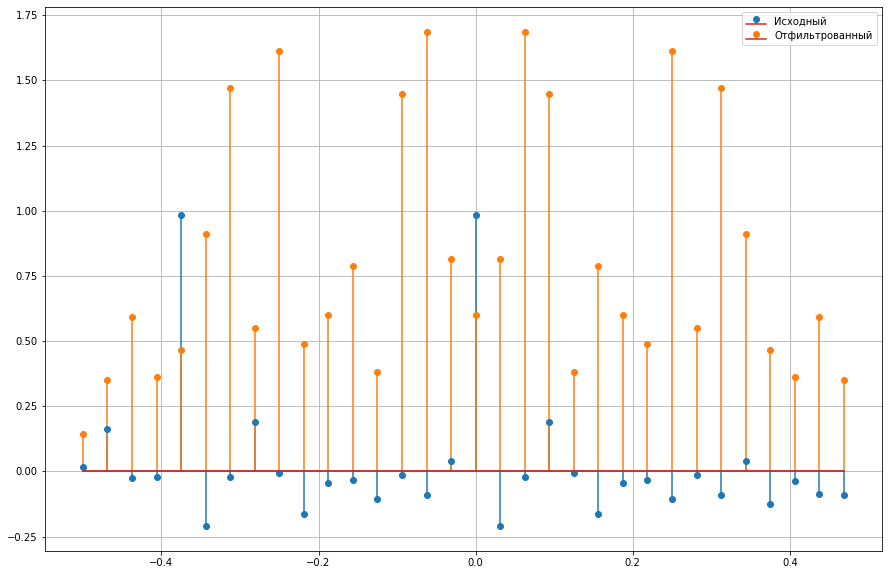

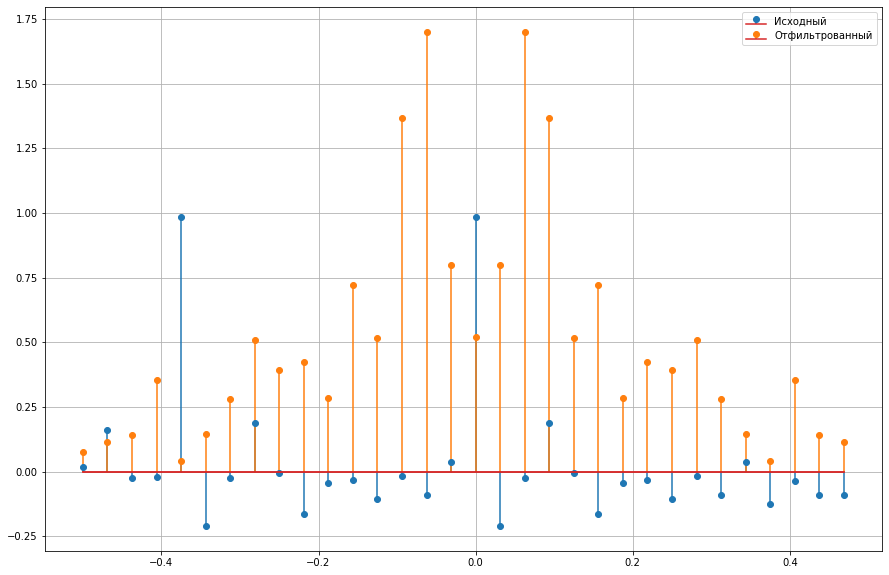

In [109]:
X = fftfreq(N + 1, T)
Y77 = np.abs(dft(Y7))

plot(X, (YX, Y77), Type='stem', legend=('Исходный', 'Отфильтрованный'))

X = fftfreq(N + 1, T)
Y1111 = np.abs(dft(Y11))

plot(X, (YX, Y1111), Type='stem', legend=('Исходный', 'Отфильтрованный'))

По графикам передаточных функций можно сделать следующие выводы:

При увеличении числа точек наблюдается обратная зависимость с полосой пропускания частот - она уменьшается. Данные передаточные функции схожи с теми, которые были получены при применении полинома второй степени, однако полоса пропускания стала еще шире.
В отличие от линейного фильтра, можно наблюдать более продолговатую часть в полосе пропускания в значениях частоты около 0. Следовательно, происходит малая потеря амплитуды при пропуске сигналов с низкой частотой в более широком диапазоне по сравнению с линейным фильтром.


## Выводы

В ходе выполнения практической работы был смоделирован аналоговый сигнал, который является линейной комбинацией косинусоид. Данный сигнал был дискретизирован, а затем изучен его спектр, полученный с помощью дискретных преобразований Фурье. К дискретизированному сигналу были применены разные фильтры. Первым рассматривался фильтр, который являлся линейным сглаживанием по 5-ти и 9-ти точкам. После применения фильтрации также был получен спектр. После этого был применён фильтр, являющийся квадратичным сглаживанием по 5-ти и 9-ти точкам, а зачем фильтр сглаживания с помощью полинома 4-ой степени по 7-ми и 11-ти точкам. Во всех случаях были рассмотрены и проанализированы полученные спектры. Все полученные сигналы и спектры были визуализированы для наглядной демонстрации результатов.